# Model Evaluation & Validation: Train Test Split

## Overview

<style>
    table.custom-table {
        max-width: 600px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 600px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Why is Train Test Split necessary?</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/02_input.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/02_output_1.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/02_output_2.png">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [1]:
import pandas as pd

df_passengers = pd.read_csv('../../../data/airline-passengers.csv', parse_dates=["Month"], index_col="Month")
data = df_passengers.asfreq('MS')['Passengers']
data

Month
1949-01-01    112
1949-02-01    118
             ... 
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 144, dtype: int64

## Previous Lesson: Overfitting Problem

1. Evaluate the model on the same data used for training.
2. Overfitting problem: the model is good to predict historical data, but not for the future.
3. Businesses depend on predicting the future, not the past.

In [2]:
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error

model = ARIMA(data, order=(0, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
y_pred = model_fit.predict()
score = mean_squared_error(data[1:], y_pred[1:], squared=False)
score

/Users/sota/miniconda3/envs/work/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


12.487395495743867

## Train Test Split: Detecting Overfitting

### Split Data

Month
1949-01-01    112
1949-02-01    118
             ... 
1957-03-01    356
1957-04-01    348
Freq: MS, Name: Passengers, Length: 100, dtype: int64

Month
1957-05-01    355
1957-06-01    422
             ... 
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 44, dtype: int64

### Evaluate Model on Test Data

In [6]:
model = ARIMA(data_train, order=(0, 1, 2), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
y_pred_test = model_fit.forecast(len(data_test))
score_test = mean_squared_error(data_test, y_pred_test, squared=False)
score

/Users/sota/miniconda3/envs/work/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



12.487395495743867

### Evaluate Model on Train Data

In [7]:
y_pred_train = model_fit.predict() 
score_train = mean_squared_error(data_train[1:], y_pred_train[1:], squared=False)
score_train

/Users/sota/miniconda3/envs/work/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



11.37028559033624

### Visualize Overfitting

## [ ] Model Comparison: SARIMA vs Exponential Smoothing

### Fit the Model

### Forecast: Calculate Predictions

,train,test,train_forecast_sarima,test_forecast_sarima,test_forecast_exponential
1949-01-01,112.0,NaN,0.00000,NaN,NaN
1949-02-01,118.0,NaN,111.99867,NaN,NaN
...,...,...,...,...,...
1960-11-01,NaN,390.0,NaN,418.207799,379.605076
1960-12-01,NaN,432.0,NaN,454.311865,417.035511


,test,test_forecast_sarima,test_forecast_exponential
1957-05-01,355.0,352.272795,351.239543
1957-06-01,422.0,406.086678,403.308153
...,...,...,...
1960-11-01,390.0,418.207799,379.605076
1960-12-01,432.0,454.311865,417.035511


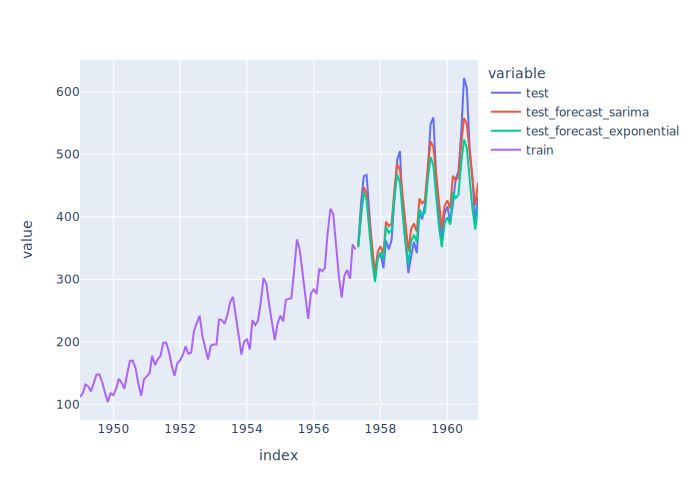

### Model's Score: Predictions vs. Reality

/Users/sota/miniconda3/envs/work/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



33.6291735577628

/Users/sota/miniconda3/envs/work/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



25.911990997475304